In [1]:
from IPython.display import display, HTML
display(HTML("""<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{fontsize:12pt;padding:5px;}
table.dataframe{font-size:12px;}))
</style>
"""))

<font size="5" color="red">ch15 평가</font>

# 0. 패키지로드 & 한글설정 & 경고메세지 ignore

In [2]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

sns.set(style = 'white', rc = {'figure.figsize':(20, 5)})

# 한글설정
plt.rc('font', family = 'Malgun Gothic')  # 윈도우즈
plt.rc('axes', unicode_minus = False)  # 축의 -부분 깨짐 방지
    
# warning(경고) 안보이게
import warnings

# warnings.filterwarnings(action = 'default')  # 경고 메세지 표시
warnings.filterwarnings(action = 'ignore')  # 경고 메세지 무시

# 문제 1.

In [3]:
df_first = pd.read_csv('c:/ai_x/download/shareData/부동산/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', 
                       encoding = 'cp949')

In [4]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [5]:
df_first.isna().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [6]:
df_first.set_index('지역', inplace = True)

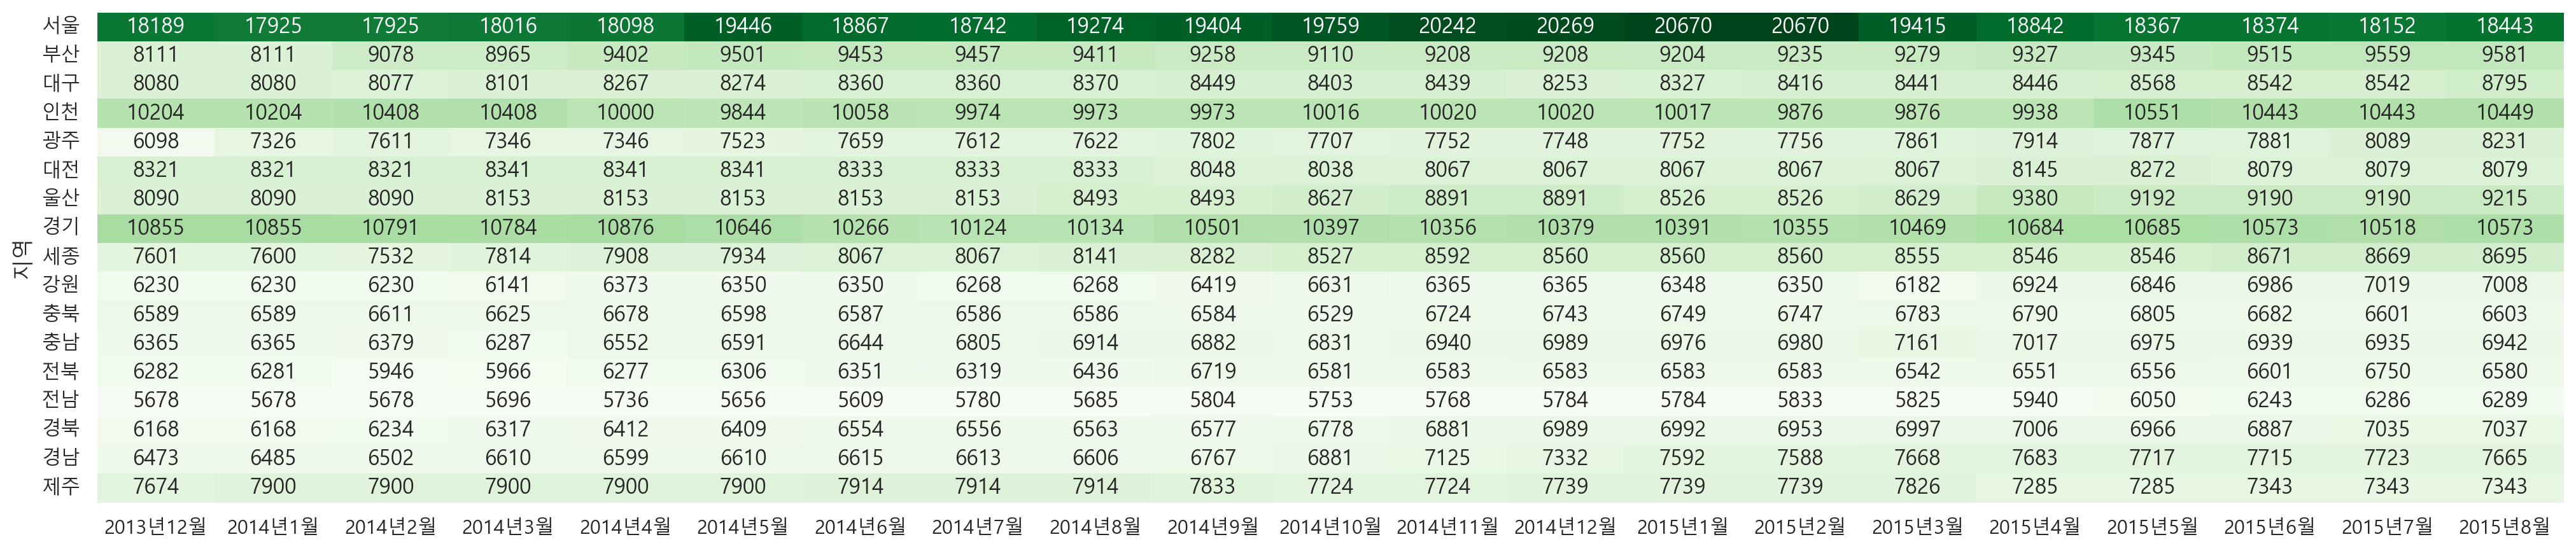

In [7]:
plt.figure(figsize = (25, 5))
sns.heatmap(df_first, annot = True, fmt = 'd', cmap = 'Greens', cbar = False)
plt.show()

# 문제 2.

In [8]:
df_last = pd.read_csv('c:/ai_x/download/shareData/부동산/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv', 
                 encoding = 'cp949')

In [9]:
df_last

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879
...,...,...,...,...,...
9090,제주,모든면적,2024,8,7703
9091,제주,전용면적 60제곱미터이하,2024,8,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN


In [10]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         9095 non-null   object
 1   규모구분        9095 non-null   object
 2   연도          9095 non-null   int64 
 3   월           9095 non-null   int64 
 4   분양가격(제곱미터)  8481 non-null   object
dtypes: int64(2), object(3)
memory usage: 355.4+ KB


In [11]:
def get_pricelen(row):
    price = row['분양가격(제곱미터)']
    if pd.notnull(price) and price.strip() != '' :
        return len(price)
    else :
        return 0

In [12]:
df_last['자리수'] = df_last.apply(get_pricelen, axis = 1)
df_last

,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
0,서울,모든면적,2015,10,5841,4
1,서울,전용면적 60제곱미터이하,2015,10,5652,4
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,4
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,4
4,서울,전용면적 102제곱미터초과,2015,10,5879,4
...,...,...,...,...,...,...
9090,제주,모든면적,2024,8,7703,4
9091,제주,전용면적 60제곱미터이하,2024,8,NaN,0
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515,4
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN,0


In [13]:
df_last.index.name = 'idx'
df_last = df_last.reset_index()
df_last

,idx,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
0,0,서울,모든면적,2015,10,5841,4
1,1,서울,전용면적 60제곱미터이하,2015,10,5652,4
2,2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,4
3,3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,4
4,4,서울,전용면적 102제곱미터초과,2015,10,5879,4
...,...,...,...,...,...,...,...
9090,9090,제주,모든면적,2024,8,7703,4
9091,9091,제주,전용면적 60제곱미터이하,2024,8,NaN,0
9092,9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515,4
9093,9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN,0


In [14]:
def comma_append(row):
    price = row['분양가격(제곱미터)']
    if (row.idx % 5 == 0) & (row.자리수 >= 4) :
        price = price[:-3] + ',' + price[-3:]
    return price

In [15]:
df_last['분양가격(제곱미터)'] = df_last.apply(comma_append, axis = 1)
df_last

,idx,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
0,0,서울,모든면적,2015,10,"5,841",4
1,1,서울,전용면적 60제곱미터이하,2015,10,5652,4
2,2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,4
3,3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,4
4,4,서울,전용면적 102제곱미터초과,2015,10,5879,4
...,...,...,...,...,...,...,...
9090,9090,제주,모든면적,2024,8,"7,703",4
9091,9091,제주,전용면적 60제곱미터이하,2024,8,NaN,0
9092,9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515,4
9093,9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN,0


In [16]:
df_last.drop(['idx', '자리수'], axis = 1, inplace = True)

In [17]:
df_last

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,"5,841"
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879
...,...,...,...,...,...
9090,제주,모든면적,2024,8,"7,703"
9091,제주,전용면적 60제곱미터이하,2024,8,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN


In [18]:
def commadrop2(price) :
    if pd.isna(price) :
        return np.nan
    elif price.strip() == '' :
        return np.nan
    elif price.find(',') != -1 :
        return int(price.replace(',',''))
    else :
        return int(price)

In [19]:
df_last['제곱미터당분양가격'] = df_last['분양가격(제곱미터)'].map(commadrop2)
df_last

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격
0,서울,모든면적,2015,10,"5,841",5841.0
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0
...,...,...,...,...,...,...
9090,제주,모든면적,2024,8,"7,703",7703.0
9091,제주,전용면적 60제곱미터이하,2024,8,NaN,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515,7515.0
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN,NaN


In [20]:
df_last['평당분양가격'] = df_last['제곱미터당분양가격'] * 3.3
df_last

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격,평당분양가격
0,서울,모든면적,2015,10,"5,841",5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0,19400.7
...,...,...,...,...,...,...,...
9090,제주,모든면적,2024,8,"7,703",7703.0,25419.9
9091,제주,전용면적 60제곱미터이하,2024,8,NaN,NaN,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515,7515.0,24799.5
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN,NaN,NaN


In [21]:
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적', '')\
                                      .str.replace('제곱미터', '㎡')\
                                      .str.replace('초과', '~')\
                                      .str.replace('이하', '')\
                                      .str.replace(' ', '')
df_last

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격,평당분양가격,전용면적
0,서울,모든면적,2015,10,"5,841",5841.0,19275.3,모든면적
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0,18651.6,60㎡
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0,19410.6,60㎡~85㎡
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0,18879.3,85㎡~102㎡
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...,...,...
9090,제주,모든면적,2024,8,"7,703",7703.0,25419.9,모든면적
9091,제주,전용면적 60제곱미터이하,2024,8,NaN,NaN,NaN,60㎡
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515,7515.0,24799.5,60㎡~85㎡
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN,NaN,NaN,85㎡~102㎡


In [22]:
df_last.drop(['규모구분', '분양가격(제곱미터)', '제곱미터당분양가격'], axis = 1, inplace = True)
df_last

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~
...,...,...,...,...,...
9090,제주,2024,8,25419.9,모든면적
9091,제주,2024,8,NaN,60㎡
9092,제주,2024,8,24799.5,60㎡~85㎡
9093,제주,2024,8,NaN,85㎡~102㎡


In [23]:
df_last = df_last[['지역명', '전용면적', '연도', '월', '평당분양가격']]
df_last

,지역명,전용면적,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3
1,서울,60㎡,2015,10,18651.6
2,서울,60㎡~85㎡,2015,10,19410.6
3,서울,85㎡~102㎡,2015,10,18879.3
4,서울,102㎡~,2015,10,19400.7
...,...,...,...,...,...
9090,제주,모든면적,2024,8,25419.9
9091,제주,60㎡,2024,8,NaN
9092,제주,60㎡~85㎡,2024,8,24799.5
9093,제주,85㎡~102㎡,2024,8,NaN


# 문제 3.

In [24]:
df_last.pivot_table(index = '지역명',
                    columns = '연도',
                    values = '평당분양가격',
                    aggfunc = 'mean').applymap(lambda x : round(x, 0)).T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.0,11061.0,8459.0,7464.0,7917.0,9019.0,8191.0,10377.0,20316.0,8765.0,9368.0,10976.0,6799.0,7110.0,7951.0,7690.0,6829.0
2016,7163.0,11685.0,8497.0,7753.0,9191.0,10282.0,8911.0,10744.0,21753.0,8858.0,9583.0,11099.0,6937.0,6907.0,9567.0,7958.0,7133.0
2017,7319.0,12296.0,8807.0,8288.0,9600.0,12192.0,9913.0,11638.0,21864.0,9133.0,10630.0,11672.0,7413.0,7406.0,12629.0,8157.0,7463.0
2018,8219.0,14258.0,9328.0,8681.0,9527.0,12139.0,10234.0,12890.0,23202.0,10340.0,10241.0,11882.0,7930.0,8175.0,11936.0,8202.0,8149.0
2019,8934.0,15666.0,10698.0,9050.0,12112.0,14082.0,12619.0,13538.0,28287.0,11299.0,10216.0,13250.0,8219.0,8532.0,11828.0,8749.0,7971.0
2020,10302.0,15106.0,10919.0,9998.0,13406.0,15314.0,11239.0,13353.0,29781.0,11628.0,12838.0,14983.0,9562.0,8559.0,14193.0,9139.0,8359.0
2021,10291.0,14567.0,11302.0,11227.0,13710.0,15586.0,11994.0,14318.0,29380.0,12578.0,14192.0,15774.0,9981.0,9048.0,22302.0,9861.0,8822.0
2022,11644.0,16622.0,12456.0,12018.0,15096.0,16822.0,14114.0,18167.0,29129.0,11310.0,17904.0,17342.0,10636.0,10003.0,18954.0,11730.0,10034.0
2023,13409.0,20175.0,13283.0,13025.0,17958.0,17657.0,17917.0,20471.0,33231.0,12278.0,18832.0,16151.0,11847.0,10966.0,24096.0,12581.0,11104.0


# 문제 4.

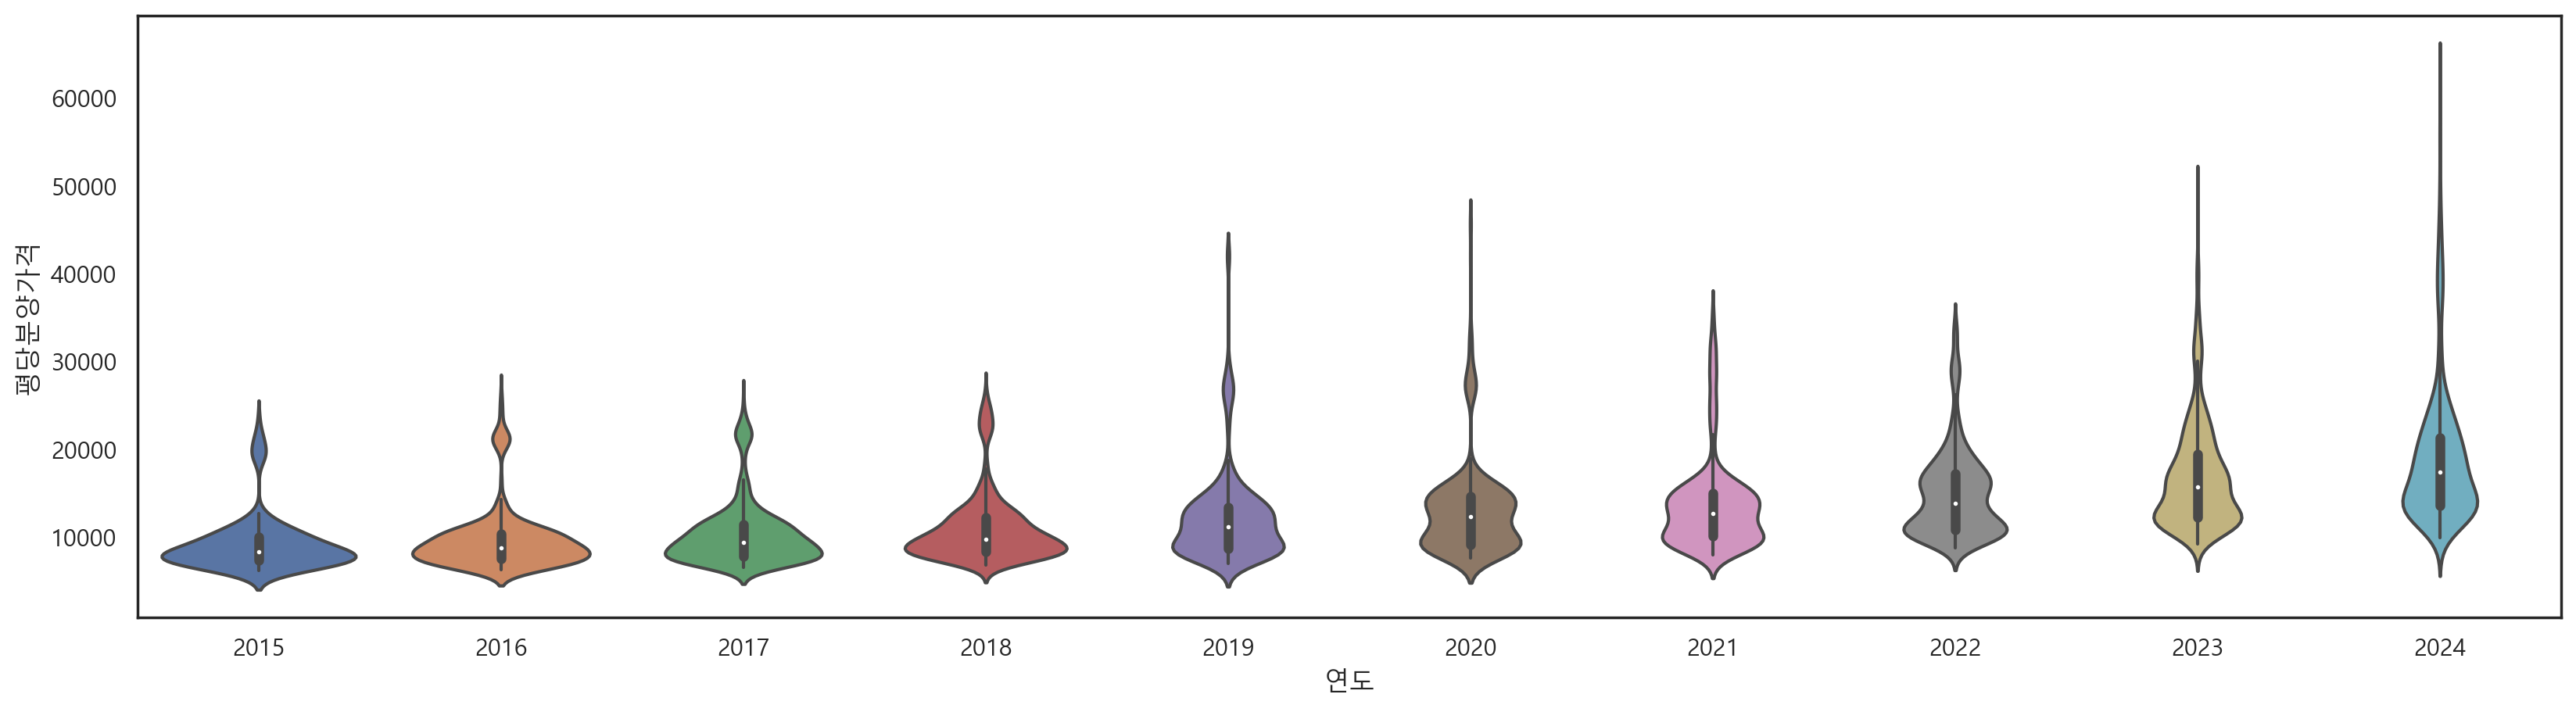

In [25]:
sns.violinplot(data = df_last, x = '연도', y = '평당분양가격')
plt.show()

# 문제 5.

In [26]:
df_first.reset_index('지역', inplace = True)
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [27]:
newdf_first = df_first.melt(id_vars = '지역',
                            var_name = '연도월', 
                            value_name = '평당분양가격')
newdf_first

,지역,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [28]:
newdf_first['연도'] = newdf_first['연도월'].map(lambda data : int(data.split('년')[0]))
newdf_first['월'] = newdf_first['연도월'].map(lambda data : int(data.split('년')[1][:-1]))
newdf_first

,지역,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12
...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8
353,전남,2015년8월,6289,2015,8
354,경북,2015년8월,7037,2015,8
355,경남,2015년8월,7665,2015,8


In [29]:
newdf_first.drop('연도월', axis = 1, inplace = True)
newdf_first

,지역,평당분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12
2,대구,8080,2013,12
3,인천,10204,2013,12
4,광주,6098,2013,12
...,...,...,...,...
352,전북,6580,2015,8
353,전남,6289,2015,8
354,경북,7037,2015,8
355,경남,7665,2015,8


In [30]:
newdf_first.columns = ['지역명', '평당분양가격', '연도', '월']
newdf_first

,지역명,평당분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12
2,대구,8080,2013,12
3,인천,10204,2013,12
4,광주,6098,2013,12
...,...,...,...,...
352,전북,6580,2015,8
353,전남,6289,2015,8
354,경북,7037,2015,8
355,경남,7665,2015,8


In [31]:
newdf_last = df_last[df_last.전용면적 == '모든면적'].copy()
newdf_last.drop('전용면적', axis = 1, inplace = True)
newdf_last

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6
...,...,...,...,...
9070,전북,2024,8,12058.2
9075,전남,2024,8,13120.8
9080,경북,2024,8,13827.0
9085,경남,2024,8,13252.8


In [32]:
df = pd.concat([newdf_first, newdf_last], axis = 0)
df.reset_index(drop = True, inplace = True)
df = df[['지역명', '평당분양가격', '연도', '월']]
df

,지역명,평당분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12
...,...,...,...,...
2171,전북,12058.2,2024,8
2172,전남,13120.8,2024,8
2173,경북,13827.0,2024,8
2174,경남,13252.8,2024,8
